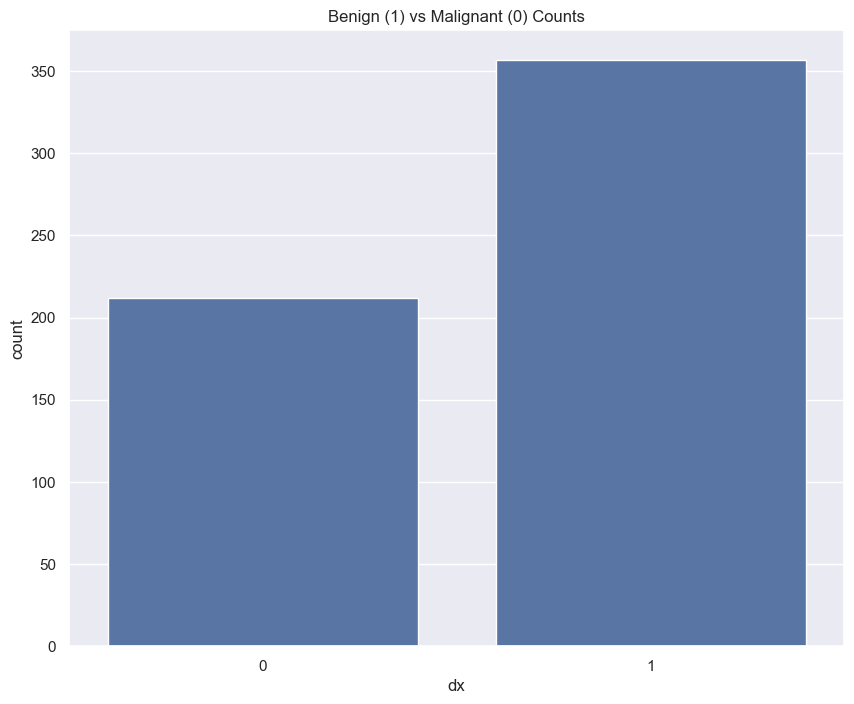

In [2]:
## 准备工作
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

## 数据导入
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
df = pd.DataFrame(X, columns=cancer.feature_names)
df['dx'] = y

# 数据可视化
sns.set()
plt.figure(figsize=(10, 8))
sns.countplot(x='dx', data=df)
plt.title('Benign (1) vs Malignant (0) Counts')
plt.show()

In [3]:
## 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1898)

## 模型训练
rf_model = RandomForestClassifier(random_state=1898)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1898)

Accuracy: 0.9824561403508771

Confusion Matrix:
 [[72  2]
 [ 1 96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        74
           1       0.98      0.99      0.98        97

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



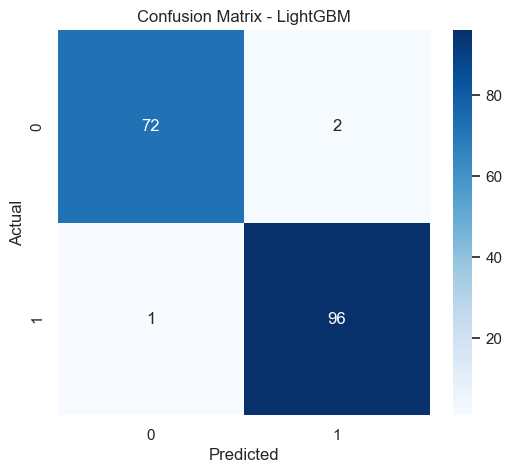


Train Accuracy: 1.0000


In [8]:
 ## 测试集预测
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# 可视化混淆矩阵
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM")
plt.show()
## 查看训练集准确率（检查是否过拟合）
train_acc = accuracy_score(y_train, rf_model.predict(X_train))
print(f"\nTrain Accuracy: {train_acc:.4f}")

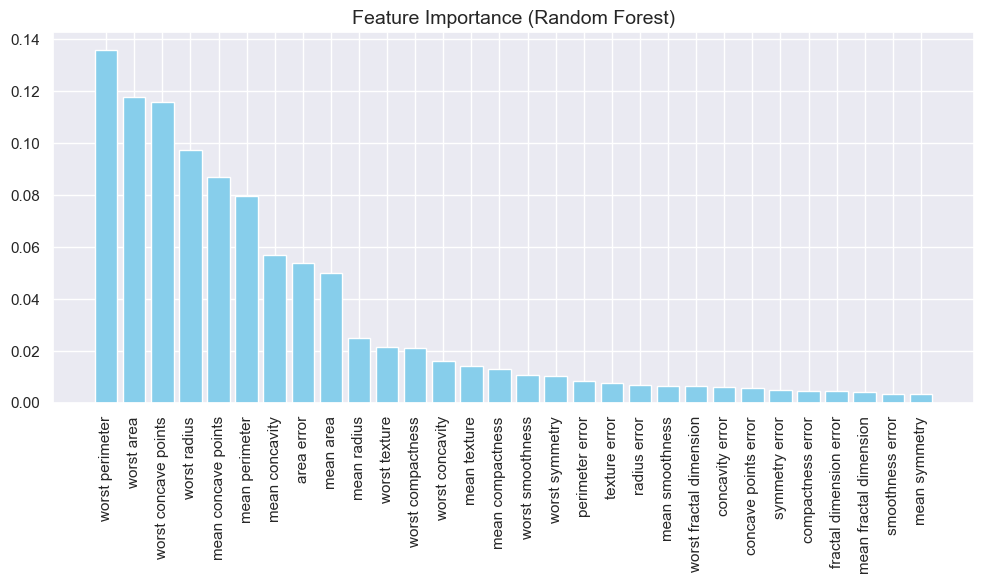

In [7]:
## 特征重要性图
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)", fontsize=14)
plt.bar(range(X.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()